# **1. Import Modules**

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

1.	Create KPIs
-	Total Revenue = sum of Sales
-	Total Profit = sum of Profit
-	Profit Ratio = Total Profit / Total Profit
-	Customer = count distinct Customer
-	Sales per Customer = Total Revenue/# Customer
-	Quantity: = sum of Quantity


# **2. Import Data**

In [2]:
df = pd.read_excel('Data/Super-Store-2021.xlsx')

In [3]:
df.head()

,Category,City,Country/Region,Customer ID,Customer Name,Order Date,Order ID,Postal Code,Product ID,Product Name,...,Ship Status,State,Sub-Category,Days to Ship Actual,Days to Ship Scheduled,Discount,Profit,Quantity,Sales,Sales Forecast
0,Furniture,Henderson,United States,CG-12520,Claire Gute,2020-11-08,CA-2020-152156,42420.0,FUR-BO-10001798,Bush Somerset Collection Bookcase,...,Shipped On Time,Kentucky,Bookcases,3,3,0.00,42,2,262,392
1,Furniture,Henderson,United States,CG-12520,Claire Gute,2020-11-08,CA-2020-152156,42420.0,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",...,Shipped On Time,Kentucky,Chairs,3,3,0.00,220,3,732,1096
2,Office Supplies,Los Angeles,United States,DV-13045,Darrin Van Huff,2020-06-12,CA-2020-138688,90036.0,OFF-LA-10000240,Self-Adhesive Address Labels for Typewriters b...,...,Shipped Late,California,Labels,4,3,0.00,7,2,15,22
3,Furniture,Fort Lauderdale,United States,SO-20335,Sean O'Donnell,2019-10-11,US-2019-108966,33311.0,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,...,Shipped Late,Florida,Tables,7,6,0.45,-383,5,958,1434
4,Office Supplies,Fort Lauderdale,United States,SO-20335,Sean O'Donnell,2019-10-11,US-2019-108966,33311.0,OFF-ST-10000760,Eldon Fold 'N Roll Cart System,...,Shipped Late,Florida,Storage,7,6,0.20,3,2,22,33


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Category                9994 non-null   object        
 1   City                    9994 non-null   object        
 2   Country/Region          9994 non-null   object        
 3   Customer ID             9994 non-null   object        
 4   Customer Name           9994 non-null   object        
 5   Order Date              9994 non-null   datetime64[ns]
 6   Order ID                9994 non-null   object        
 7   Postal Code             9983 non-null   float64       
 8   Product ID              9994 non-null   object        
 9   Product Name            9994 non-null   object        
 10  Region                  9994 non-null   object        
 11  Row ID                  9994 non-null   int64         
 12  Segment                 9994 non-null   object  

# **3. KPIs**

In [15]:
#Total revenue = total sales
"${:,.0f}".format(df['Sales'].sum())

'$2,297,354'

In [10]:
#Total profit = total profit
"${:,.0f}".format(df['Profit'].sum())

'$286,347'

In [11]:
#Profit ratio = total profit / total revenue
"{:.2%}".format(df['Profit'].sum()/df['Sales'].sum())

'12.46%'

In [13]:
#Customer = count distinct customer
df['Customer ID'].nunique()

793

In [19]:
#Sales per Customer = Total revenue / Customer
"${:,.1f}".format(df['Sales'].sum() / df['Customer ID'].nunique())

'$2,897.0'

In [21]:
#Quantity = sum of Quantity
"{:,.0f}".format(df['Quantity'].sum())

'37,873'

# **4. Visualization**

2.	Using bar chart to visualize Total Revenue/ Total Profit /# Customer/ Sales per Customer/ Quantity by Region. If you are the analyst, what should you comment based on this information.

## Numerical Pre-processing

In [23]:
df.columns

Index(['Category', 'City', 'Country/Region', 'Customer ID', 'Customer Name',
       'Order Date', 'Order ID', 'Postal Code', 'Product ID', 'Product Name',
       'Region', 'Row ID', 'Segment', 'Ship Date', 'Ship Mode', 'Ship Status',
       'State', 'Sub-Category', 'Days to Ship Actual',
       'Days to Ship Scheduled', 'Discount', 'Profit', 'Quantity', 'Sales',
       'Sales Forecast'],
      dtype='object')

In [24]:
df_region = pd.DataFrame({'Revenue': df.groupby('Region')['Sales'].sum(),
                'Profit':df.groupby('Region')['Profit'].sum(),
                'No Customer':df.groupby('Region')['Customer ID'].nunique(),
                'Quantity':df.groupby('Region')['Quantity'].sum()
            }).reset_index()
df_region

,Region,Revenue,Profit,No Customer,Quantity
0,Central,501256,39719,629,8780
1,East,678834,91521,674,10618
2,South,391750,46721,512,6209
3,West,725514,108386,686,12266


In [25]:
df_region['Sales per customer'] = df_region['Revenue'] / df_region['No Customer']
df_region

,Region,Revenue,Profit,No Customer,Quantity,Sales per customer
0,Central,501256,39719,629,8780,796.909380
1,East,678834,91521,674,10618,1007.172107
2,South,391750,46721,512,6209,765.136719
3,West,725514,108386,686,12266,1057.600583


## Visualizing

[Text(0, 0.5, 'Sales per customer ($)'),
 Text(0.5, 0, 'Region'),
 Text(0.5, 1.0, 'Sales per customer by Region')]

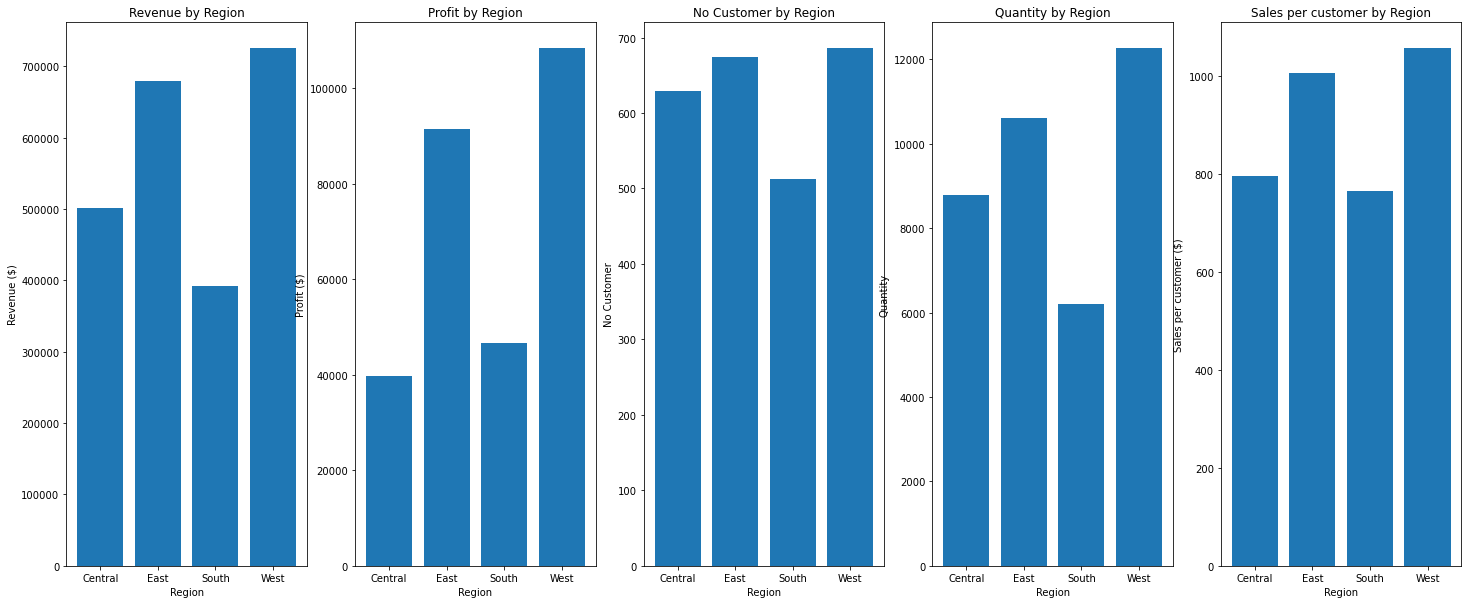

In [34]:
fig, ax = plt.subplots(ncols=5, figsize=(25, 10))
ax[0].bar(df_region['Region'], df_region['Revenue'])
ax[0].set(ylabel='Revenue ($)', xlabel='Region', title='Revenue by Region')

ax[1].bar(df_region['Region'], df_region['Profit'])
ax[1].set(ylabel='Profit ($)', xlabel='Region', title='Profit by Region')

ax[2].bar(df_region['Region'], df_region['No Customer'])
ax[2].set(ylabel='No Customer', xlabel='Region', title='No Customer by Region')

ax[3].bar(df_region['Region'], df_region['Quantity'])
ax[3].set(ylabel='Quantity', xlabel='Region', title='Quantity by Region')

ax[4].bar(df_region['Region'], df_region['Sales per customer'])
ax[4].set(ylabel='Sales per customer ($)', xlabel='Region', title='Sales per customer by Region')


# **5. Pivot table**

3.	Using cross-tab table to create dataframe about detail of product as below:
 
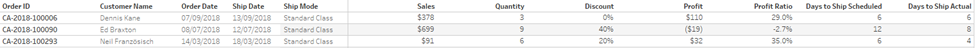

In [35]:
df.columns

Index(['Category', 'City', 'Country/Region', 'Customer ID', 'Customer Name',
       'Order Date', 'Order ID', 'Postal Code', 'Product ID', 'Product Name',
       'Region', 'Row ID', 'Segment', 'Ship Date', 'Ship Mode', 'Ship Status',
       'State', 'Sub-Category', 'Days to Ship Actual',
       'Days to Ship Scheduled', 'Discount', 'Profit', 'Quantity', 'Sales',
       'Sales Forecast'],
      dtype='object')

In [36]:
col_dim = ['Order ID', 'Customer Name', 'Order Date', 'Ship Date', 'Ship Mode']

In [49]:
df_tab = pd.pivot_table(df, 
               index=col_dim, 
               values=['Sales','Quantity','Days to Ship Scheduled', 'Days to Ship Actual', 'Discount', 'Profit'], 
               aggfunc={'Sales':sum,
                        'Quantity':sum,
                        'Discount':np.mean,
                        'Profit':sum,
                        'Days to Ship Scheduled':np.mean,
                        'Days to Ship Actual':np.mean
                }).reset_index()

df_tab

,Order ID,Customer Name,Order Date,Ship Date,Ship Mode,Days to Ship Actual,Days to Ship Scheduled,Discount,Profit,Quantity,Sales
0,CA-2018-100006,Dennis Kane,2018-09-07,2018-09-13,Standard Class,6,6,0.000000,110,3,378
1,CA-2018-100090,Ed Braxton,2018-07-08,2018-07-12,Standard Class,4,6,0.200000,-19,9,699
2,CA-2018-100293,Neil Französisch,2018-03-14,2018-03-18,Standard Class,4,6,0.200000,32,6,91
3,CA-2018-100328,Jasper Cacioppo,2018-01-28,2018-02-03,Standard Class,6,6,0.200000,1,1,4
4,CA-2018-100363,Jim Mitchum,2018-04-08,2018-04-15,Standard Class,7,6,0.200000,8,5,21
...,...,...,...,...,...,...,...,...,...,...,...
5004,US-2021-168802,Jack O'Briant,2021-11-03,2021-11-07,Standard Class,4,6,0.200000,6,4,18
5005,US-2021-169320,Lena Hernandez,2021-07-23,2021-07-25,Second Class,2,3,0.000000,16,7,172
5006,US-2021-169488,Allen Armold,2021-09-07,2021-09-09,First Class,2,1,0.000000,27,7,57
5007,US-2021-169502,Matthew Grinstein,2021-08-28,2021-09-01,Standard Class,4,6,0.000000,33,8,114


In [50]:
df_tab['Discount'] = (df_tab['Discount'] * 100).map('{:.0f}%'.format)
df_tab

,Order ID,Customer Name,Order Date,Ship Date,Ship Mode,Days to Ship Actual,Days to Ship Scheduled,Discount,Profit,Quantity,Sales
0,CA-2018-100006,Dennis Kane,2018-09-07,2018-09-13,Standard Class,6,6,0%,110,3,378
1,CA-2018-100090,Ed Braxton,2018-07-08,2018-07-12,Standard Class,4,6,20%,-19,9,699
2,CA-2018-100293,Neil Französisch,2018-03-14,2018-03-18,Standard Class,4,6,20%,32,6,91
3,CA-2018-100328,Jasper Cacioppo,2018-01-28,2018-02-03,Standard Class,6,6,20%,1,1,4
4,CA-2018-100363,Jim Mitchum,2018-04-08,2018-04-15,Standard Class,7,6,20%,8,5,21
...,...,...,...,...,...,...,...,...,...,...,...
5004,US-2021-168802,Jack O'Briant,2021-11-03,2021-11-07,Standard Class,4,6,20%,6,4,18
5005,US-2021-169320,Lena Hernandez,2021-07-23,2021-07-25,Second Class,2,3,0%,16,7,172
5006,US-2021-169488,Allen Armold,2021-09-07,2021-09-09,First Class,2,1,0%,27,7,57
5007,US-2021-169502,Matthew Grinstein,2021-08-28,2021-09-01,Standard Class,4,6,0%,33,8,114


In [ ]:
def formatProfit(x):
    if x < 0:
        return '({:,.0f})'.format(abs(x))
    else:
        return '{:,.0f}'.format(x)


In [52]:
df_tab['Profit Ratio'] = (df_tab['Profit'] / df_tab['Sales'] * 100).map('{:.0f}%'.format)
df_tab

,Order ID,Customer Name,Order Date,Ship Date,Ship Mode,Days to Ship Actual,Days to Ship Scheduled,Discount,Profit,Quantity,Sales,Profit Ratio
0,CA-2018-100006,Dennis Kane,2018-09-07,2018-09-13,Standard Class,6,6,0%,110,3,378,29%
1,CA-2018-100090,Ed Braxton,2018-07-08,2018-07-12,Standard Class,4,6,20%,-19,9,699,-3%
2,CA-2018-100293,Neil Französisch,2018-03-14,2018-03-18,Standard Class,4,6,20%,32,6,91,35%
3,CA-2018-100328,Jasper Cacioppo,2018-01-28,2018-02-03,Standard Class,6,6,20%,1,1,4,25%
4,CA-2018-100363,Jim Mitchum,2018-04-08,2018-04-15,Standard Class,7,6,20%,8,5,21,38%
...,...,...,...,...,...,...,...,...,...,...,...,...
5004,US-2021-168802,Jack O'Briant,2021-11-03,2021-11-07,Standard Class,4,6,20%,6,4,18,33%
5005,US-2021-169320,Lena Hernandez,2021-07-23,2021-07-25,Second Class,2,3,0%,16,7,172,9%
5006,US-2021-169488,Allen Armold,2021-09-07,2021-09-09,First Class,2,1,0%,27,7,57,47%
5007,US-2021-169502,Matthew Grinstein,2021-08-28,2021-09-01,Standard Class,4,6,0%,33,8,114,29%


In [44]:
df[df['Order ID']=='CA-2018-100090']

,Category,City,Country/Region,Customer ID,Customer Name,Order Date,Order ID,Postal Code,Product ID,Product Name,...,Ship Status,State,Sub-Category,Days to Ship Actual,Days to Ship Scheduled,Discount,Profit,Quantity,Sales,Sales Forecast
6287,Furniture,San Francisco,United States,EB-13705,Ed Braxton,2018-07-08,CA-2018-100090,94122.0,FUR-TA-10003715,Hon 2111 Invitation Series Corner Table,...,Shipped Early,California,Tables,4,6,0.2,-88,3,502,753
6288,Office Supplies,San Francisco,United States,EB-13705,Ed Braxton,2018-07-08,CA-2018-100090,94122.0,OFF-BI-10001597,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ...",...,Shipped Early,California,Binders,4,6,0.2,69,6,197,295


4.	Using the provided data, ask some question
-	Which shipping mode does the customer choose based on the category and #Quantity?
-	Which product was buy the most in Revenue? in Revenue? in #Quantity?


In [55]:
df.columns

Index(['Category', 'City', 'Country/Region', 'Customer ID', 'Customer Name',
       'Order Date', 'Order ID', 'Postal Code', 'Product ID', 'Product Name',
       'Region', 'Row ID', 'Segment', 'Ship Date', 'Ship Mode', 'Ship Status',
       'State', 'Sub-Category', 'Days to Ship Actual',
       'Days to Ship Scheduled', 'Discount', 'Profit', 'Quantity', 'Sales',
       'Sales Forecast'],
      dtype='object')

In [58]:
df_ship_mode = pd.pivot_table(df, 
               index=['Ship Mode', 'Category'], 
               values=['Quantity'], 
               aggfunc=sum
                )
df_ship_mode

Quantity
Ship Mode      Category                 
First Class    Furniture            1238
               Office Supplies      3372
               Technology           1083
Same Day       Furniture             453
               Office Supplies      1147
               Technology            360
Second Class   Furniture            1569
               Office Supplies      4480
               Technology           1374
Standard Class Furniture            4768
               Office Supplies     13907
               Technology           4122

In [62]:
df_product = df.pivot_table(index='Product Name',
               values=['Sales','Quantity'],
               aggfunc=sum).reset_index()
df_product.sort_values(by='Quantity', ascending=False)

,Product Name,Quantity,Sales
1498,Staples,215,755
1492,Staple envelope,170,1684
536,Easy-staple paper,150,2503
1499,Staples in misc. colors,86,479
941,KI Adjustable-Height Table,74,4554
...,...,...,...
748,Global Enterprise Series Seating Low-Back Swiv...,1,207
1792,Xerox 20,1,6
1252,Penpower WorldCard Pro Card Scanner,1,91
385,"Bush Saratoga Collection 5-Shelf Bookcase, Han...",1,120


In [63]:
df_product.sort_values(by='Sales', ascending=False)

,Product Name,Quantity,Sales
404,Canon imageCLASS 2200 Advanced Copier,20,61600
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,31,27454
444,Cisco TelePresence System EX90 Videoconferenci...,6,22638
785,HON 5400 Series Task Chairs for Big and Tall,39,21870
685,GBC DocuBind TL300 Electric Binding System,37,19824
...,...,...,...
1779,Xerox 1989,2,8
783,Grip Seal Envelopes,2,7
1792,Xerox 20,1,6
208,Avery 5,2,6
